In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
[columns for columns in df.columns if df[columns].isnull().sum()>1]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
columns_na=[]
for columns in df.columns:
    if df[columns].isnull().sum()>1:
        columns_na.append(columns)
columns_na        

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
for columns in columns_na:
    print("{} has {}% missng value".format(columns,np.round(df[columns].isnull().sum()/len(df)*100,2)))

rate has 15.03% missng value
phone has 2.34% missng value
location has 0.04% missng value
rest_type has 0.44% missng value
dish_liked has 54.29% missng value
cuisines has 0.09% missng value
approx_cost(for two people) has 0.67% missng value


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
df[df["approx_cost(for two people)"].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [13]:
df["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [14]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [15]:
def repalce_comma(x):
    return x.replace(',','')
    

In [16]:
df['approx_cost(for two people)'].astype(str).apply(repalce_comma)

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [17]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [19]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [20]:
df['rate'].isnull().sum()

7775

In [21]:
def split(x):
    return x.split('/')[0]

In [22]:
df['rate']=df['rate'].astype(str).apply(split)

In [23]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [24]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [25]:
df['rate']=df['rate'].astype(float)

In [26]:
df['rate'].dtype

dtype('float64')

### How many types of restaurants we have?

In [27]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Bakery, Food Court                2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

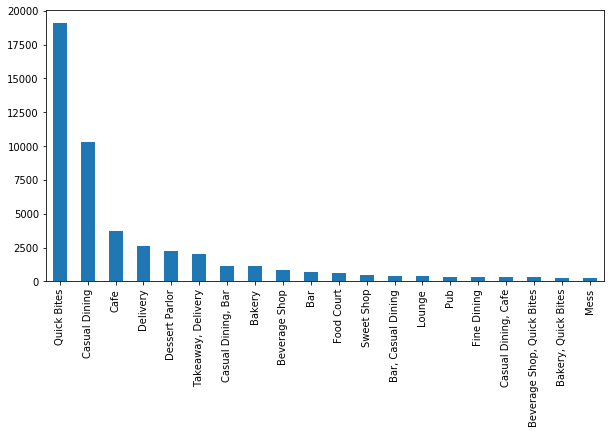

In [28]:
plt.figure(figsize=(10,5))
df['rest_type'].value_counts().nlargest(20).plot.bar()

In [29]:
def mark(x):
    if x in ('Quick Bites', 'Casual Dining'):
        return 'Quick Bites+Casual Dining'
    else:
        return 'other'


In [30]:
df['Top types']=df['rest_type'].apply(mark)

In [31]:
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining


In [32]:
d=df['Top types'].value_counts()

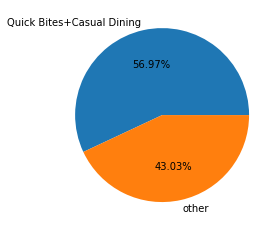

In [33]:
plt.pie(d, labels=['Quick Bites+Casual Dining','other'], autopct='%1.2f%%')
plt.show()

### Almost 60 % of restaurants are of Casual Dining & Quick Bites

In [34]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top types                       object
dtype: object

In [35]:
rest=df.groupby('name').agg({'votes':'sum','url':'count','rate':'mean','approx_cost(for two people)':'mean'}).reset_index()
rest.head()

,name,votes,url,rate,approx_cost(for two people)
0,#FeelTheROLL,14,2,3.4,200.0
1,#L-81 Cafe,432,9,3.9,400.0
2,#Vibes Restro,0,3,NaN,700.0
3,#refuel,111,3,3.7,400.0
4,'Brahmins' Thatte Idli,0,1,NaN,100.0


In [36]:
rest.columns=['names','total_votes','total_unit','avg_rate','mean_cost']
rest.head()

,names,total_votes,total_unit,avg_rate,mean_cost
0,#FeelTheROLL,14,2,3.4,200.0
1,#L-81 Cafe,432,9,3.9,400.0
2,#Vibes Restro,0,3,NaN,700.0
3,#refuel,111,3,3.7,400.0
4,'Brahmins' Thatte Idli,0,1,NaN,100.0


In [37]:
rest['Total_votes_per_unity']=rest['total_votes']/rest['total_unit']

In [38]:
rest.head()

,names,total_votes,total_unit,avg_rate,mean_cost,Total_votes_per_unity
0,#FeelTheROLL,14,2,3.4,200.0,7.0
1,#L-81 Cafe,432,9,3.9,400.0,48.0
2,#Vibes Restro,0,3,NaN,700.0,0.0
3,#refuel,111,3,3.7,400.0,37.0
4,'Brahmins' Thatte Idli,0,1,NaN,100.0,0.0


In [39]:
popular=rest.sort_values(by='total_unit', ascending=False)
popular

,names,total_votes,total_unit,avg_rate,mean_cost,Total_votes_per_unity
1320,Cafe Coffee Day,3089,96,3.147191,844.791667,32.177083
5549,Onesta,347520,85,4.410588,600.000000,4088.470588
3788,Just Bake,2898,73,3.355882,400.000000,39.698630
2446,Empire Restaurant,229808,71,3.916901,685.211268,3236.732394
2577,Five Star Chicken,3134,70,3.425000,257.857143,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,3.400000,150.000000,11.000000
8076,The Shake Factory Originals,8,1,3.300000,200.000000,8.000000
5216,Nethravathi Military Hotel,0,1,NaN,200.000000,0.000000
7426,Swadisht North Indian Restaurant,23,1,3.200000,200.000000,23.000000


Text(0.5, 1.0, 'Top 5 Least Voted Restaurants')

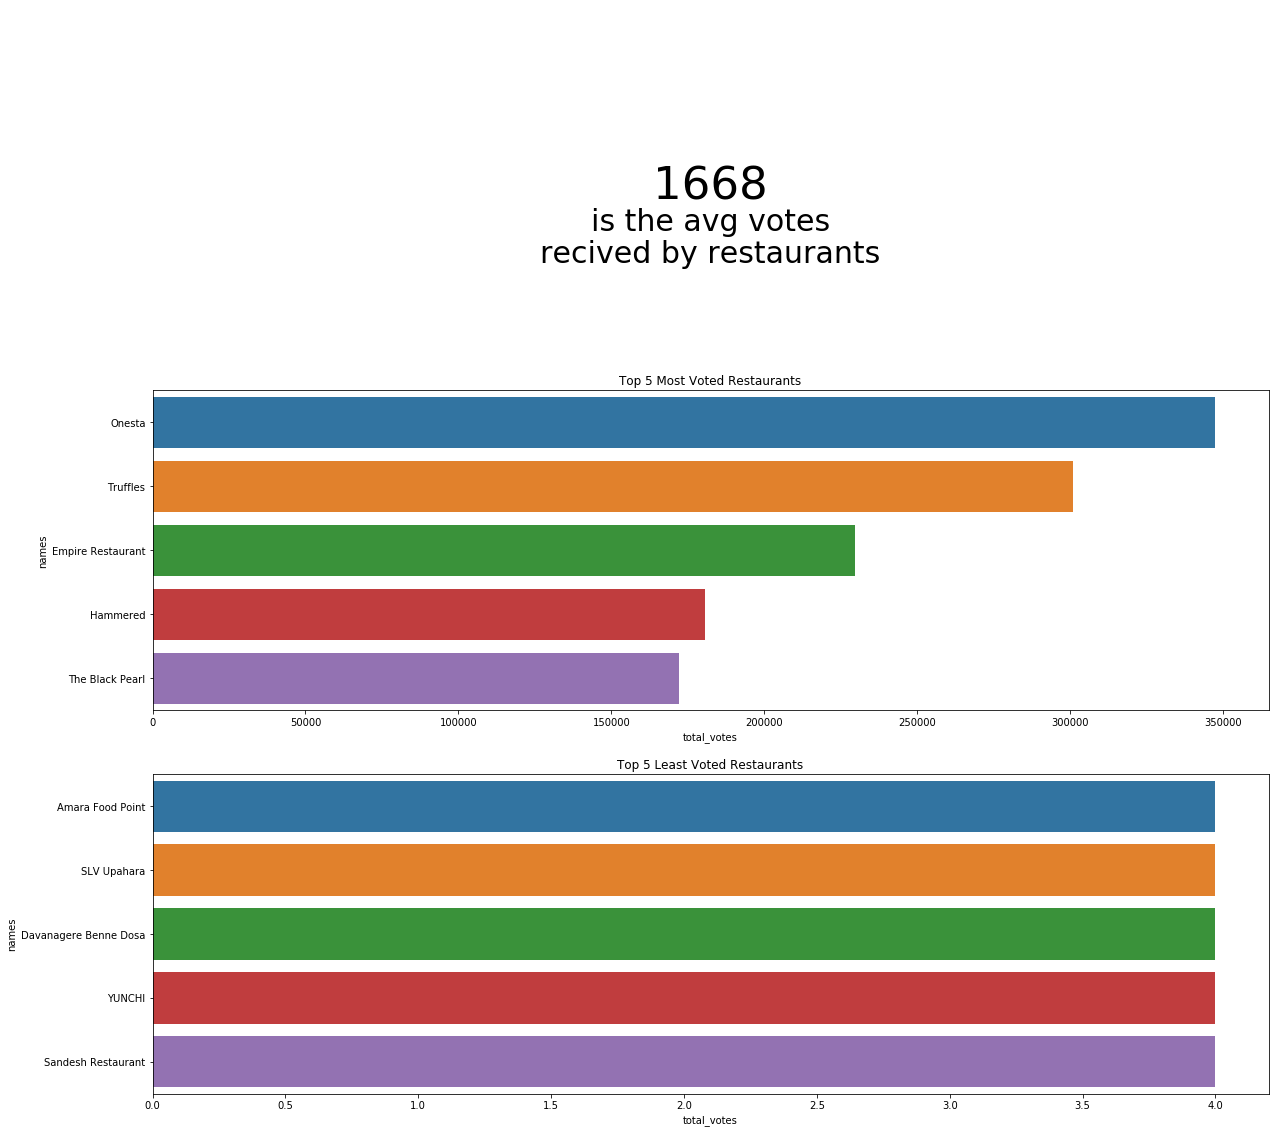

In [40]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,20))
ax1.text(0.50,0.40 ,int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50,0.30, 'is the avg votes', fontsize=30, ha='center')
ax1.text(0.50,0.20, 'recived by restaurants', fontsize=30, ha='center')
ax1.axis("off")
sns.barplot(x='total_votes',y='names',data=popular.sort_values(by="total_votes",ascending=False).query("total_votes > 0").head(5),ax=ax2)
ax2.set_title("Top 5 Most Voted Restaurants")
sns.barplot(x='total_votes',y='names',data=popular.sort_values(by="total_votes").query("total_votes > 0").head(5),ax=ax3)
ax3.set_title("Top 5 Least Voted Restaurants")

 ### 1) analyze most expensive and most cheapest restaurants in Bangalore City.
 

Text(0.5, 1.0, 'Top 5 cheapest Restaurants')

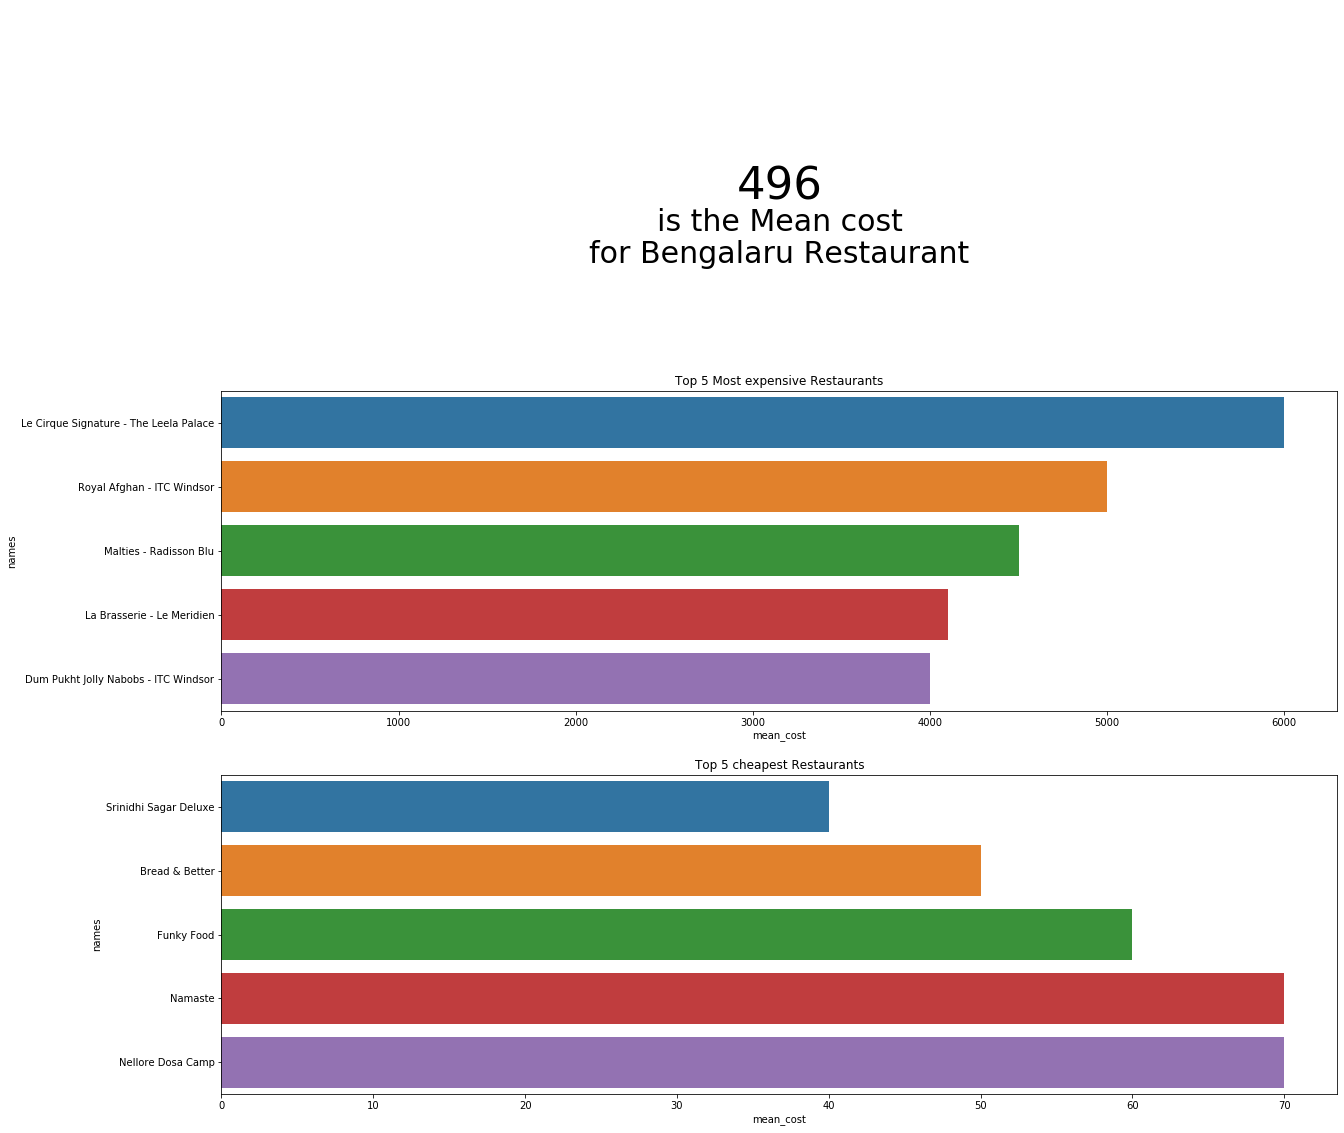

In [41]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,20))
ax1.text(0.50,0.40 ,int(popular['mean_cost'].mean()), fontsize=45, ha='center')
ax1.text(0.50,0.30, 'is the Mean cost', fontsize=30, ha='center')
ax1.text(0.50,0.20, 'for Bengalaru Restaurant', fontsize=30, ha='center')
ax1.axis("off")
sns.barplot(x='mean_cost',y='names',data=popular.sort_values(by="mean_cost",ascending=False).query("mean_cost > 0").head(5),ax=ax2)
ax2.set_title("Top 5 Most expensive Restaurants")
sns.barplot(x='mean_cost',y='names',data=popular.sort_values(by="mean_cost").query("mean_cost > 0").head(5),ax=ax3)
ax3.set_title("Top 5 cheapest Restaurants")

### How many restaurants offer Book Table Service? and how about online order service

In [42]:
x=df['book_table'].value_counts()

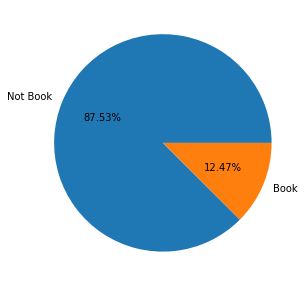

In [43]:
plt.figure(figsize=(5,5))
plt.pie(x, labels=['Not Book','Book'], autopct='%1.2f%%')
plt.show()

In [44]:
u=df['online_order'].value_counts()

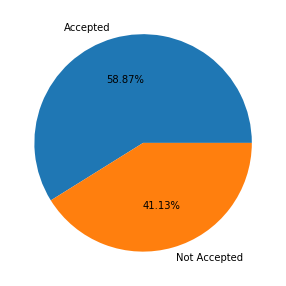

In [45]:
plt.figure(figsize=(5,5))
plt.pie(u, labels=['Accepted','Not Accepted'], autopct='%1.2f%%')
plt.show()

In [46]:
#df['location'].unique()

In [47]:
#df['rest_type'].unique()

In [48]:
def return_budget(location,restaurent_type):
    filter=((df['approx_cost(for two people)']<=400) & (df['location']==location) &(df['rate']>=4) &(df['rest_type']==restaurent_type))
    budget=df[filter]
    return (budget['name'].unique())


In [49]:
return_budget("Sarjapur Road",'Cafe')

array(['Chaai Resto'], dtype=object)

!pip install geopy

In [50]:
from geopy.geocoders import Nominatim
geolocator=Nominatim(user_agent='app')

In [51]:
data=df['name'][0]
data

'Jalsa'

In [52]:
data=geolocator.geocode(data)

In [53]:
data.latitude

43.5625752

In [54]:
data.longitude

-79.7107038

In [55]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [56]:
lat=[]
lon=[]
for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [57]:
locations['latitude']=lat
locations['longitude']=lon

In [58]:
locations.head()

,Name,latitude,longitude
0,Banashankari,15.887678,75.704678
1,Basavanagudi,12.941726,77.575502
2,Mysore Road,12.387214,76.666963
3,Jayanagar,27.643927,83.052805
4,Kumaraswamy Layout,12.908149,77.555318


In [59]:
rest_location=df['location'].value_counts().reset_index()

In [60]:
rest_location

,index,location
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,Yelahanka,6
89,West Bangalore,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [61]:
rest_location.columns=['Name','count']
rest_location

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,Yelahanka,6
89,West Bangalore,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [62]:
Restaurant_location=rest_location.merge(locations,on='Name').dropna()

In [63]:
Restaurant_location.head()

,Name,count,latitude,longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,12.934377,77.628415
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858


In [64]:
#!pip install folium

In [65]:
import folium

In [66]:
from folium.plugins import HeatMap

In [67]:
basemap=folium.Map(location=[12.97,77.59])
#basemap

In [68]:
HeatMap(data=Restaurant_location[['latitude','longitude']]).add_to(basemap)

In [164]:
basemap

In [70]:
#!pip install wordcloud

In [71]:
from wordcloud import WordCloud, STOPWORDS

In [72]:
wordclo=df[df['rest_type']=='Quick Bites']
wordclo.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites+Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites+Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites+Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites+Casual Dining


In [73]:
dishes=''
for word in wordclo['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
        dishes=dishes+' '.join(words)+' '

In [74]:
#dishes

In [75]:
stopwords=set(STOPWORDS)

In [76]:
wordcloud=WordCloud(stopwords=stopwords,width=2000,height=2000).generate(dishes)

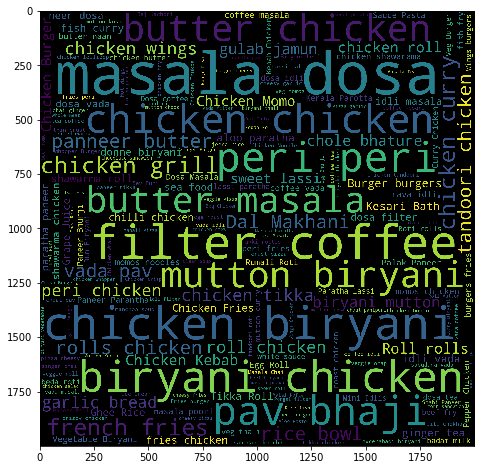

In [77]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)

In [78]:
wordcl=df[df['rest_type']== 'Casual Dining']

In [79]:
dish=''
for word in wordcl['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
        dish=dish+' '.join(words)+' '

In [80]:
#dish

In [81]:
wordcloud1=WordCloud(stopwords=stopwords,width=2000,height=2000).generate(dish)

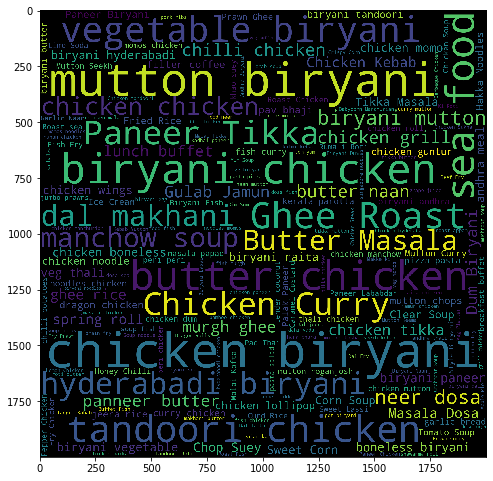

In [82]:
plt.figure(figsize=(8,10))
plt.imshow(wordcloud1)

In [83]:
ms=df['reviews_list'][0]
ms

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [84]:
ms=ms.lower()

In [85]:
import re

In [86]:
ms1=re.sub('[^a-zA-z]',' ',ms)
ms1

'[  rated        rated\\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated\\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers      rated        rated\\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly

In [87]:
ms2=re.sub('rated',' ',ms1)
ms2

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [88]:
ms3=re.sub('x',' ',ms2)
ms3

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [89]:
ms5=re.sub(' +',' ',ms3)
ms5

'[ \\n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again \\n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout \\ncheers \\n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come f

In [90]:
dataset=df[df['rest_type']=='Quick Bites']
dataset.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites+Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites+Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites+Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites+Casual Dining


In [91]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-z]',' ',review)
    review=re.sub('rated',' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review+str(review)

In [92]:
wordcloud3=WordCloud(stopwords=stopwords,width=1500,height=1500).generate(total_review)

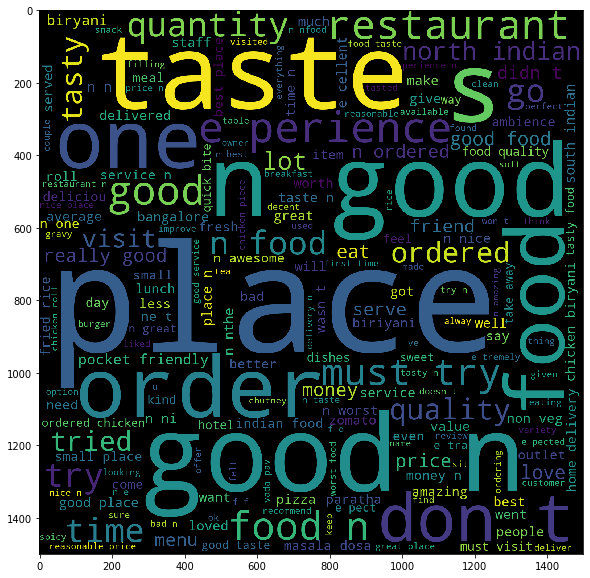

In [93]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud3)

In [94]:
#df.head()

In [95]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [96]:
df['rated']=df['rate'].apply(assign)

In [97]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [98]:
new_restaurent=df[df['rated']==0]
train_val_restaurent=df[df['rated']==1]

In [99]:
#train_val_restaurent.head()
#new_restaurent.head()

In [100]:
train_val_restaurent['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [101]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [102]:
value=3.75
train_val_restaurent['target']=train_val_restaurent['rate'].apply(lambda x:1 if x>=value else 0)

In [103]:
train_val_restaurent.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1


In [104]:
h=train_val_restaurent['target'].value_counts()

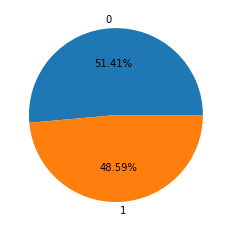

In [105]:
plt.pie(h,labels=[0,1],autopct='%1.2f%%')
plt.show()

In [106]:
train_val_restaurent.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top types', 'rated', 'target'],
      dtype='object')

In [107]:
def count(x):
    return len(x.split(','))

In [108]:
train_val_restaurent['total_cuisines']=train_val_restaurent['cuisines'].astype(str).apply(count)
train_val_restaurent['total_rest_type']=train_val_restaurent['rest_type'].astype(str).apply(count)

In [109]:
train_val_restaurent.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top types,rated,target,total_cuisines,total_rest_type
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,...,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,3,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,other,1,1,3,2
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,...,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,0,2,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+Casual Dining,1,1,2,1


In [110]:
imp_feature=[ 'online_order', 'book_table', 'location', 'rest_type','approx_cost(for two people)', 'listed_in(type)',
             'listed_in(city)','target','total_cuisines', 'total_rest_type']

In [111]:
data1=train_val_restaurent[imp_feature]

In [112]:
data1.head()

,online_order,book_table,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,total_cuisines,total_rest_type
0,Yes,Yes,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800.0,Buffet,Banashankari,1,3,2
3,No,No,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,2,1
4,No,No,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,2,1


In [113]:
data1.shape

(41665, 10)

In [114]:
data1.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
total_rest_type                  0
dtype: int64

In [115]:
data1.dropna(how='any',inplace=True)

In [116]:
data1.shape

(41271, 10)

In [117]:
cat_feature=[col for col in data1.columns if data1[col].dtype=='O']
num_feature=[col for col in data1.columns if data1[col].dtype!='O']

In [118]:
cat_feature

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [119]:
num_feature

['approx_cost(for two people)', 'target', 'total_cuisines', 'total_rest_type']

In [120]:
for feature in cat_feature:
    print('{} has total {} unique feature'.format(feature,data1[feature].nunique()))

online_order has total 2 unique feature
book_table has total 2 unique feature
location has total 92 unique feature
rest_type has total 87 unique feature
listed_in(type) has total 7 unique feature
listed_in(city) has total 30 unique feature


In [121]:
value=(data1['location'].value_counts()/len(data1))*100
value

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64

In [122]:
ther=0.4
imp=value[value>ther]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Richmond Road            1.463497
Residency Road           1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [123]:
data1['location']=data1['location'].apply(lambda x:'other' if x not in imp.index else x)

In [124]:
data1['location'].nunique()

47

In [125]:
value1=(data1['rest_type'].value_counts()/len(data1))*100
value1

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Bakery, Food Court             0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [126]:
ther=1.5
imp1=value1[value1>ther]
imp1

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [127]:
data1['rest_type']=data1['rest_type'].apply(lambda x:'other' if x not in imp1.index else x)

In [128]:
#data1['rest_type'].head(20)

In [129]:
data_cat=data1[cat_feature]

In [130]:
data_cat['location'].nunique()

47

In [131]:
for col in cat_feature:
    col_encoded=pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col,axis=1,inplace=True)

In [132]:
data_cat.shape

(41271, 93)

In [133]:
#data_cat.head()

In [134]:
num_feature

['approx_cost(for two people)', 'target', 'total_cuisines', 'total_rest_type']

In [135]:
data_final=pd.concat([data1.loc[:,['approx_cost(for two people)', 'target', 'total_cuisines', 'total_rest_type']],data_cat],axis=1)

In [136]:
data_final.head()

,approx_cost(for two people),target,total_cuisines,total_rest_type,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,800.0,1,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,1,3,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,1,3,2,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1,2,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [137]:
x=data_final.drop('target',axis=1)
y=data_final['target']

In [138]:
from sklearn.model_selection import train_test_split 

In [139]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30,random_state=7)

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf=RandomForestClassifier()

In [142]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [143]:
y_pred=rf.predict(x_test)

In [144]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [146]:
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_pred,y_test)))

Confusion Matrix:
[[5304 1489]
 [1091 4498]]


In [147]:
print('Model Accuracy Score is {}'.format(accuracy_score(y_pred,y_test)))

Model Accuracy Score is 0.791633015667905


In [148]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=7)

In [149]:
lr.fit(x_train,y_train)

LogisticRegression(random_state=7)

In [150]:
y_pred1=lr.predict(x_test)

In [151]:
y_pred1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [152]:
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_pred1,y_test)))

Confusion Matrix:
[[5231 2389]
 [1164 3598]]


In [153]:
print('Model Accuracy Score is {}'.format(accuracy_score(y_pred1,y_test)))

Model Accuracy Score is 0.7130512033597157


In [154]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)

In [155]:
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_pred2,y_test)))
print('Model Accuracy Score is {}'.format(accuracy_score(y_pred2,y_test)))

Confusion Matrix:
[[5468 1294]
 [ 927 4693]]
Model Accuracy Score is 0.8206267162009369


In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [159]:
models=[]
models.append(('Naive bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Xgboost',XGBClassifier()))

In [163]:
for name,model in models:
    print(name)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    cm=confusion_matrix(prediction,y_test)
    print("Confusion Matrix: \n{}".format(cm))
    acc=accuracy_score(prediction,y_test)
    print("Accuracy Score:\n{}".format(acc))
    print('\n')

Naive bayes
Confusion Matrix: 
[[4590 2140]
 [1805 3847]]
Accuracy Score:
0.6813923437247618


KNN
Confusion Matrix: 
[[5453 1569]
 [ 942 4418]]
Accuracy Score:
0.7972056210628331


Xgboost
[12:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix: 
[[5681 1768]
 [ 714 4219]]
Accuracy Score:
0.7995477305766435


